# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.metrics import confusion_matrix



## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [5]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [7]:
sorted_cat_dict

{'Warmth': 1388,
 'Care_Hunger': 1388,
 'History_Civics': 5914,
 'Music_Arts': 10293,
 'AppliedLearning': 12135,
 'SpecialNeeds': 13642,
 'Health_Sports': 14223,
 'Math_Science': 41421,
 'Literacy_Language': 52239}

## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [9]:
sorted_sub_cat_dict

{'Economics': 269,
 'CommunityService': 441,
 'FinancialLiteracy': 568,
 'ParentInvolvement': 677,
 'Extracurricular': 810,
 'Civics_Government': 815,
 'ForeignLanguages': 890,
 'NutritionEducation': 1355,
 'Warmth': 1388,
 'Care_Hunger': 1388,
 'SocialSciences': 1920,
 'PerformingArts': 1961,
 'CharacterEducation': 2065,
 'TeamSports': 2192,
 'Other': 2372,
 'College_CareerPrep': 2568,
 'Music': 3145,
 'History_Geography': 3171,
 'Health_LifeScience': 4235,
 'EarlyDevelopment': 4254,
 'ESL': 4367,
 'Gym_Fitness': 4509,
 'EnvironmentalScience': 5591,
 'VisualArts': 6278,
 'Health_Wellness': 10234,
 'AppliedSciences': 10816,
 'SpecialNeeds': 13642,
 'Literature_Writing': 22179,
 'Mathematics': 28074,
 'Literacy': 33700}

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,34858,p000002,638363148ff34bcbe004fcaeb7c9a544,Mrs.,HI,9/20/2016 21:19,Grades 6-8,21st Century Learners Across the Ocean,Our native Hawaiian students of the valley hai...,We like to combine 21st century learning with ...,NaN,NaN,My students need headphones and supplemental s...,1,1,History_Civics,History_Geography,Our native Hawaiian students of the valley hai...
1,89122,p000003,c8e40d76c14dbc404075f9013d5cd166,Mrs.,NY,6/23/2016 9:21,Grades PreK-2,Kindergarten Loves Literacy Centers,My students are excited for their first year i...,Our students love literacy centers! Every morn...,NaN,NaN,My students need phonemic awareness learning c...,5,1,Literacy_Language,Literature_Writing,My students are excited for their first year i...


In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[50000])
print("="*50)

Our native Hawaiian students of the valley hail from a tight knit community.  Many are from low socioeconomic backgrounds. Yet they remain a proud people not inclined to ask for hand outs. They   are genuine souls who face trials and tribulations on a daily basis. \r\n\r\nOur students come from predominately low socio-economic backgrounds with over 80% of our students receiving free or reduced lunch.  We also have a population of students who are homeless. \r\n\r\nIn spite of their struggles they come to school with positive attitudes and a smile. They are genuine, caring, and always thankful. Many aspire to attend college and will work hard to make that happen.We like to combine 21st century learning with traditional learning.  This allows our students the time to acclimate to the changes and become active 21st century learners.  \r\n\r\nAs 21st century learners, the students require access to a variety of tools and technology. Use of technology serves to engage the students with vary

In [13]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:32<00:00, 1182.46it/s]


In [14]:
# after preprocesing
project_data['essay']=preprocessed_essays
print(project_data['essay'][0])

native hawaiian students valley hail tight knit community many low socioeconomic backgrounds yet remain proud people not inclined ask hand outs genuine souls face trials tribulations daily basis students come predominately low socio economic backgrounds 80 students receiving free reduced lunch also population students homeless spite struggles come school positive attitudes smile genuine caring always thankful many aspire attend college work hard make happen like combine 21st century learning traditional learning allows students time acclimate changes become active 21st century learners 21st century learners students require access variety tools technology use technology serves engage students varying learning styles watch videos individually whole class lamps allow us turn overhead lights minimize glare headphones used videos watched individually work well students hearing aids workbooks provide daily practice structure carpet runners students need variety carpet allows get seats sit f

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [15]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 30783.65it/s]


In [16]:
# after preprocesing
project_data['project_title']=preprocessed_titles
print(project_data['project_title'][0])

21st century learners across ocean


In [17]:
#Preprocessing the project_grade_category
project_grade_category_cleaned=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    project_grade_category_cleaned.append(grade)
project_data['Project_grade_category']=project_grade_category_cleaned

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 414429.09it/s]


In [18]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [19]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,Project_grade_category,price,quantity
0,34858,p000002,638363148ff34bcbe004fcaeb7c9a544,Mrs.,HI,9/20/2016 21:19,Grades 6-8,21st century learners across ocean,Our native Hawaiian students of the valley hai...,We like to combine 21st century learning with ...,...,NaN,My students need headphones and supplemental s...,1,1,History_Civics,History_Geography,native hawaiian students valley hail tight kni...,Grades_6_8,515.89,21
1,89122,p000003,c8e40d76c14dbc404075f9013d5cd166,Mrs.,NY,6/23/2016 9:21,Grades PreK-2,kindergarten loves literacy centers,My students are excited for their first year i...,Our students love literacy centers! Every morn...,...,NaN,My students need phonemic awareness learning c...,5,1,Literacy_Language,Literature_Writing,students excited first year kindergarten not e...,Grades_PreK_2,298.97,4


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [20]:
from sklearn.model_selection import train_test_split
# split the data set into train and test respectively 80% and 20%
y=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1, inplace=True)
x=project_data
X_temp,X_test,Y_temp,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)
# split the data set into train and cv respectively 60% and 20%  
X_train,X_cv,Y_train,Y_cv=train_test_split(X_temp,Y_temp,test_size=0.2,random_state=1)
print("Shape of Train data set X={} Y={}".format(X_train.shape,Y_train.shape))
print("Shape of Test data set X={} Y={}".format(X_test.shape,Y_test.shape))
print("Shape of CV data set X={} Y={}".format(X_cv.shape,Y_cv.shape))

Shape of Train data set X=(69918, 20) Y=(69918,)
Shape of Test data set X=(21850, 20) Y=(21850,)
Shape of CV data set X=(17480, 20) Y=(17480,)


In [21]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(X_train.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
X_train['Date'] = pd.to_datetime(X_train['project_submitted_datetime'])
X_train.drop('project_submitted_datetime', axis=1, inplace=True)
X_train.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
X_train = X_train[cols]
X_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,Project_grade_category,price,quantity
18308,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:00,Grades 3-5,sensory tools focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,SpecialNeeds,SpecialNeeds,imagine 8 9 years old third grade classroom se...,Grades_3_5,213.03,8
79692,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:00,Grades PreK-2,mobile learning mobile listening center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,Literacy_Language,Literacy,class 24 students comes diverse learners stude...,Grades_PreK_2,329.00,1


## 1.5 Preparing data for models

In [22]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'Project_grade_category', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.5.1 Vectorizing Categorical data

In [23]:
# we use count vectorizer to convert the values into one hot encoded features
# Project categories
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_categories = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()),lowercase=False, binary=True)

tr_categories_one_hot=vectorizer_categories.fit_transform(X_train['clean_categories'].values)
print(vectorizer_categories.get_feature_names())

cv_categories_one_hot =vectorizer_categories.transform(X_cv['clean_categories'].values)
te_categories_one_hot =vectorizer_categories.transform(X_test['clean_categories'].values)

print(tr_categories_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'Project categories'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_categories_one_hot.shape,cv_categories_one_hot.shape,te_categories_one_hot.shape))

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
[[0 0 0 0 0 1 0 0 0]]

Shape of matrix after one hot encodig for 'Project categories'
Train data-(69918, 9),
CV data	-(17480, 9)
Test data-(21850, 9)


In [24]:
# we use count vectorizer to convert the values into one hot encoded features
# Project subcategories
vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

tr_sub_categories_one_hot=vectorizer_subcategories.fit_transform(X_train['clean_subcategories'].values)
print(vectorizer_subcategories.get_feature_names())

cv_sub_categories_one_hot = vectorizer_subcategories.transform(X_cv['clean_subcategories'].values)
te_sub_categories_one_hot = vectorizer_subcategories.transform(X_test['clean_subcategories'].values)

print(tr_sub_categories_one_hot.toarray()[0:2])
print("\nShape of matrix after one hot encodig for 'Project sub categories'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_sub_categories_one_hot.shape,cv_sub_categories_one_hot.shape,te_sub_categories_one_hot.shape))

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

Shape of matrix after one hot encodig for 'Project sub categories'
Train data-(69918, 30),
CV data	-(17480, 30)
Test data-(21850, 30)


In [25]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one hot encoded features
#teacher_prefix
vectorizer_teacher_prefix = CountVectorizer(lowercase=False, binary=True)
tr_teacher_prefix_one_hot=vectorizer_teacher_prefix.fit_transform(X_train['teacher_prefix'].values.astype('str'))
print(vectorizer_teacher_prefix.get_feature_names())

cv_teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values.astype('str'))
te_teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values.astype('str'))

print(tr_teacher_prefix_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'teacher_prefix'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_teacher_prefix_one_hot.shape,cv_teacher_prefix_one_hot.shape,te_teacher_prefix_one_hot.shape))

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
[[0 0 0 1 0 0]]

Shape of matrix after one hot encodig for 'teacher_prefix'
Train data-(69918, 6),
CV data	-(17480, 6)
Test data-(21850, 6)


In [26]:
# we use count vectorizer to convert the values into one hot encoded features
#school_state
vectorizer_school_state = CountVectorizer(lowercase=False, binary=True)
tr_school_state_one_hot=vectorizer_school_state.fit_transform(X_train['school_state'].values.astype('str'))
print(vectorizer_school_state.get_feature_names())

cv_school_state_one_hot = vectorizer_school_state.transform(X_cv['school_state'].values.astype('str'))
te_school_state_one_hot = vectorizer_school_state.transform(X_test['school_state'].values.astype('str'))

print(tr_school_state_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'teacher_prefix'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_school_state_one_hot.shape,cv_school_state_one_hot.shape,te_school_state_one_hot.shape))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]

Shape of matrix after one hot encodig for 'teacher_prefix'
Train data-(69918, 51),
CV data	-(17480, 51)
Test data-(21850, 51)


In [27]:
# we use count vectorizer to convert the values into one hot encoded features
#project_grade_category
vectorizer_grade_category = CountVectorizer(lowercase=False, binary=True)
tr_grade_category_one_hot=vectorizer_grade_category.fit_transform(X_train['Project_grade_category'])
print(vectorizer_grade_category.get_feature_names())

cv_grade_category_one_hot = vectorizer_grade_category.transform(X_cv['Project_grade_category'])
te_grade_category_one_hot = vectorizer_grade_category.transform(X_test['Project_grade_category'])

print(tr_grade_category_one_hot.toarray()[0:1])
print(cv_grade_category_one_hot.toarray()[0:1])
print(te_grade_category_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'project_grade_category'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_grade_category_one_hot.shape,cv_grade_category_one_hot.shape,te_grade_category_one_hot.shape))

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
[[1 0 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]

Shape of matrix after one hot encodig for 'project_grade_category'
Train data-(69918, 4),
CV data	-(17480, 4)
Test data-(21850, 4)


### 1.5.2 standardizing Numerical features

In [28]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
tr_price_standardized=price_scalar.fit_transform(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
te_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 297.05198518264257, Standard deviation : 367.67309409512563


In [29]:
print("\nShape of matrix after column standardization for 'price'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_price_standardized.shape,cv_price_standardized.shape,te_price_standardized.shape))


Shape of matrix after column standardization for 'price'
Train data-(69918, 1),
CV data	-(17480, 1)
Test data-(21850, 1)


In [30]:
#quantity
quantity_scalar = StandardScaler()
tr_quantity_standardized=quantity_scalar.fit_transform(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_quantity_standardized = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
te_quantity_standardized = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'quantity'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_quantity_standardized.shape,cv_quantity_standardized.shape,te_quantity_standardized.shape))

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 17.053619954804198, Standard deviation : 26.479145940777403


C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.




Shape of matrix after column standardization for 'quantity'
Train data-(69918, 1),
CV data	-(17480, 1)
Test data-(21850, 1)


In [31]:
#teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
tr_teacher_number_of_previously_posted_projects_standardized=teacher_number_of_previously_posted_projects_scalar.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
te_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_teacher_number_of_previously_posted_projects_standardized.shape,cv_teacher_number_of_previously_posted_projects_standardized.shape,te_teacher_number_of_previously_posted_projects_standardized.shape))

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 11.187576875768757, Standard deviation : 27.867468947288852


C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.




Shape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'
Train data-(69918, 1),
CV data	-(17480, 1)
Test data-(21850, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 <h4><font color='red'>  Bag of Words on `preprocessed_essay`</font></h4>

In [32]:
#Bag of words of Project essays
# We are considering only the words which appeared in at least 10 documents(rows or projects) and max feature is 8000.
#Fitting train data because we need all and transforming  train ,cv and test vector shape should be same.
vectorizer_essays = CountVectorizer(min_df=10,max_features=8000)#max_features=8000
tr_text_bow=vectorizer_essays.fit_transform(X_train['essay']) # fitting train data 

#transforming train,cv and test data

cv_text_bow = vectorizer_essays.transform(X_cv['essay'])
te_text_bow = vectorizer_essays.transform(X_test['essay'])
print("Shape of matrix after one hot encodig \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_bow.shape,cv_text_bow.shape,te_text_bow.shape))

Shape of matrix after one hot encodig 
Train data-(69918, 8000),
CV data	-(17480, 8000)
Test data-(21850, 8000)


In [33]:
print('Some feature names of bag of words of the essays')
print('='*50)
print(vectorizer_essays.get_feature_names()[1000:1020])
print(tr_text_bow.toarray()[0:1])

Some feature names of bag of words of the essays
['brush', 'brushes', 'bubble', 'bubbles', 'bubbly', 'bucket', 'buckets', 'bucks', 'buddies', 'budding', 'buddy', 'budget', 'budgeting', 'budgets', 'buds', 'bug', 'bugs', 'build', 'builder', 'builders']
[[0 0 0 ... 0 0 0]]


<h4><font color='red'> Bag of Words on `project_title`</font></h4>

In [34]:
#Bag of words project_title
# We are considering only the words which appeared in at least 5 documents(rows or projects) and max number of feature is 1700.
#Fitting train data and transforming  train ,cv and test vector shape should be same.
vectorizer_title = CountVectorizer(min_df=5,max_features=1700)
tr_text_bow_title=vectorizer_title.fit_transform(X_train['project_title'])
cv_text_bow_title = vectorizer_title.transform(X_cv['project_title'])
te_text_bow_title = vectorizer_title.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_bow_title.shape,cv_text_bow_title.shape,te_text_bow_title.shape))

Shape of matrix after one hot encodig 
Train data-(69918, 1700),
CV data	-(17480, 1700)
Test data-(21850, 1700)


In [35]:
print('Some feature names of bag of words of the project title')
print('='*50)
print(vectorizer_title.get_feature_names()[1000:1020])
print(tr_text_bow_title.toarray()[0:2])

Some feature names of bag of words of the project title
['motion', 'motivate', 'motivated', 'motivating', 'motivation', 'motor', 'mouse', 'move', 'movement', 'movers', 'moves', 'movie', 'movin', 'moving', 'mr', 'mrs', 'ms', 'much', 'multi', 'multicultural']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 1.5.2.2 TFIDF vectorizer
<h4><font color='red'>  TFIDF Vectorizer on `preprocessed_essay`</font></h4>

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_essays = TfidfVectorizer(min_df=10)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_text_tfidf=tfidf_vectorizer_essays.fit_transform(X_train['project_title'])
cv_text_tfidf = tfidf_vectorizer_essays.transform(X_cv['project_title'])
te_text_tfidf = tfidf_vectorizer_essays.transform(X_test['project_title'])
print("Shape of matrix TFIDF Vectorizer on essays \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_tfidf.shape,cv_text_tfidf.shape,te_text_tfidf.shape))

Shape of matrix TFIDF Vectorizer on essays 
Train data-(69918, 2562),
CV data	-(17480, 2562)
Test data-(21850, 2562)


In [37]:
print('Sample of TFIDF Vectorizer on essays')
print('='*50)
print(tr_text_tfidf.toarray()[0:1])
print(tfidf_vectorizer_essays.get_feature_names()[300:310])

Sample of TFIDF Vectorizer on essays
[[0. 0. 0. ... 0. 0. 0.]]
['build', 'builders', 'building', 'builds', 'bump', 'bundle', 'burning', 'business', 'busy', 'but']


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [38]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_title = TfidfVectorizer(min_df=10)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_title_tfidf=tfidf_vectorizer_title.fit_transform(X_train['project_title'])

cv_title_tfidf = tfidf_vectorizer_title.transform(X_cv['project_title'])
te_title_tfidf = tfidf_vectorizer_title.transform(X_test['project_title'])

print("Shape of matrix TFIDF Vectorizer on essays \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_title_tfidf.shape,cv_title_tfidf.shape,te_title_tfidf.shape))

Shape of matrix TFIDF Vectorizer on essays 
Train data-(69918, 2562),
CV data	-(17480, 2562)
Test data-(21850, 2562)


In [39]:
print('Sample of TFIDF Vectorizer on `project_title`')
print('='*50)
print(tr_title_tfidf.toarray()[0:1,1980:2000])
print(tfidf_vectorizer_title.get_feature_names()[100:110])

Sample of TFIDF Vectorizer on `project_title`
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.57100504 0.         0.
  0.         0.        ]]
['another', 'answer', 'answers', 'ants', 'any', 'anymore', 'anyone', 'anything', 'anywhere', 'ap']


In [40]:
'''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

'''# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================'''
'''
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)'''


'\nwords = []\nfor i in preprocessed_essays:\n    words.extend(i.split(\' \'))\n\nfor i in preprocessed_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors and our coupus",       len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")\n\nwords_courpus = {}\nwords_glove = set(model.keys())\nfor i in words:\n    if i in words_glove:\n        words_courpus[i] = model[i]\nprint("word 2 vec length", len(words_courpus))\n\n\n# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/\n\nimport pickle\nwith open(\'glove_vectors\', \'wb\') as f:\n    pickle.dump(words_courpus, f)'

In [41]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h4><font color='red'> Using Pretrained Models: AVG W2V on `preprocessed_essay`</font></h4>

In [42]:
# average Word2Vec
# compute average word2vec for each review.
def AVG_w2v(preprocessed_data):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return(avg_w2v_vectors)

#print(len(avg_w2v_vectors))
#print(len(avg_w2v_vectors[1]))


In [43]:
#using above defined function "AVG_w2v" to compute average word2vec for each review in train,cv and test data.
tr_avg_w2v_vectors=AVG_w2v(X_train['essay'])
cv_avg_w2v_vectors=AVG_w2v(X_cv['essay'])
te_avg_w2v_vectors=AVG_w2v(X_test['essay'])

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:09<00:00, 2271.64it/s]


In [44]:
print(len(tr_avg_w2v_vectors),len(cv_avg_w2v_vectors),len(te_avg_w2v_vectors))

69918 17480 21850


<h4><font color='red'> Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [45]:
#using above defined function "AVG_w2v" to compute average word2vec for each review in train,cv and test data.
tr_avg_w2v_vectors_project_title=AVG_w2v(X_train['project_title'])
cv_avg_w2v_vectors_project_title=AVG_w2v(X_cv['project_title'])
te_avg_w2v_vectors_project_title=AVG_w2v(X_test['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 52552.06it/s]


#### <font color='red'>1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [46]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [47]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(preprocessed_data,words):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in words):
                vec = model[word] # getting the vector for each word
                 # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return(tfidf_w2v_vectors)


In [48]:
#using above defined function "tfidf w2v" to compute average word2vec for each review in train,cv and test data.
words=tfidf_words
tr_tfidf_w2v_vectors=tfidf_w2v(X_train['essay'],words)
cv_tfidf_w2v_vectors=tfidf_w2v(X_cv['essay'],words)
te_tfidf_w2v_vectors=tfidf_w2v(X_test['essay'],words)

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [00:56<00:00, 384.43it/s]


<h4><font color='red'>Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [49]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_project_title = TfidfVectorizer()
tfidf_model_project_title.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_project_title.get_feature_names(), list(tfidf_model_project_title.idf_)))
tfidf_project_title_words = set(tfidf_model_project_title.get_feature_names())

In [50]:
#using above defined function "tfidf w2v" to compute average word2vec for each review in train,cv and test data.
words=tfidf_project_title_words
tr_tfidf_w2v_project_title_vectors=tfidf_w2v(X_train['project_title'],words)
cv_tfidf_w2v_project_title_vectors=tfidf_w2v(X_cv['project_title'],words)
te_tfidf_w2v_project_title_vectors=tfidf_w2v(X_test['project_title'],words)

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:01<00:00, 20402.42it/s]


In [51]:
print(len(tr_tfidf_w2v_project_title_vectors),len(cv_tfidf_w2v_project_title_vectors),len(te_tfidf_w2v_project_title_vectors))

69918 17480 21850


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [52]:
print(tr_school_state_one_hot.shape)
print(tr_categories_one_hot.shape)
#print(sub_categories.shape)
print(tr_sub_categories_one_hot.shape)
print(tr_teacher_prefix_one_hot.shape)
print(tr_grade_category_one_hot.shape)
print(tr_price_standardized.shape)
print(tr_quantity_standardized.shape)
print(tr_teacher_number_of_previously_posted_projects_standardized.shape)
print(tr_text_bow_title.shape)
print(tr_text_bow.shape)
print()

(69918, 51)
(69918, 9)
(69918, 30)
(69918, 6)
(69918, 4)
(69918, 1)
(69918, 1)
(69918, 1)
(69918, 1700)
(69918, 8000)



In [53]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(BOW)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_BOW= hstack((tr_school_state_one_hot,tr_categories_one_hot,tr_sub_categories_one_hot,tr_teacher_prefix_one_hot,tr_grade_category_one_hot,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_text_bow_title,tr_text_bow)).tocsr()
cv_X_BOW= hstack((cv_school_state_one_hot,cv_categories_one_hot,cv_sub_categories_one_hot,cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_text_bow_title,cv_text_bow)).tocsr()
te_X_BOW= hstack((te_school_state_one_hot,te_categories_one_hot,te_sub_categories_one_hot,te_teacher_prefix_one_hot,te_grade_category_one_hot,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_text_bow_title,te_text_bow)).tocsr()
tr_X_BOW=tr_X_BOW.toarray()
cv_X_BOW=cv_X_BOW.toarray()
te_X_BOW=te_X_BOW.toarray()
print(tr_X_BOW.shape)
print(cv_X_BOW.shape)
print(te_X_BOW.shape)

(69918, 9802)
(17480, 9802)
(21850, 9802)
Wall time: 4.94 s


In [54]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(TFIDF)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_TFIDF= hstack((tr_school_state_one_hot,tr_categories_one_hot, tr_sub_categories_one_hot,tr_teacher_prefix_one_hot,tr_grade_category_one_hot,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_title_tfidf,tr_text_tfidf))
cv_X_TFIDF= hstack((cv_school_state_one_hot,cv_categories_one_hot, cv_sub_categories_one_hot,cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_title_tfidf,cv_text_tfidf))
te_X_TFIDF= hstack((te_school_state_one_hot,te_categories_one_hot, te_sub_categories_one_hot,te_teacher_prefix_one_hot,te_grade_category_one_hot,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_title_tfidf,te_text_tfidf))

tr_X_TFIDF=tr_X_TFIDF.toarray()
cv_X_TFIDF=cv_X_TFIDF.toarray()
te_X_TFIDF=te_X_TFIDF.toarray()
print(tr_X_TFIDF.shape)
print(cv_X_TFIDF.shape)
print(te_X_TFIDF.shape)

(69918, 5226)
(17480, 5226)
(21850, 5226)
Wall time: 10.8 s


In [143]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# categorical, numerical features + project_title(AVG W2V)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_AVG_W2V= hstack((tr_school_state_one_hot,tr_categories_one_hot, tr_sub_categories_one_hot,tr_teacher_prefix_one_hot,tr_grade_category_one_hot,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_avg_w2v_vectors_project_title,tr_avg_w2v_vectors))
cv_X_AVG_W2V= hstack((cv_school_state_one_hot,cv_categories_one_hot, cv_sub_categories_one_hot,cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_avg_w2v_vectors_project_title,cv_avg_w2v_vectors))
te_X_AVG_W2V= hstack((te_school_state_one_hot,te_categories_one_hot, te_sub_categories_one_hot,te_teacher_prefix_one_hot,te_grade_category_one_hot,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_avg_w2v_vectors_project_title,te_avg_w2v_vectors))
tr_X_AVG_W2V=tr_X_AVG_W2V.toarray()
cv_X_AVG_W2V=cv_X_AVG_W2V.toarray()
te_X_AVG_W2V=te_X_AVG_W2V.toarray()     
print(tr_X_AVG_W2V.shape,cv_X_AVG_W2V.shape,te_X_AVG_W2V.shape)                     

(69918, 702) (17480, 702) (21850, 702)
Wall time: 7.9 s


In [144]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# categorical, numerical features + project_title(TFIDF W2V)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_tfidf_w2v= hstack((tr_school_state_one_hot,tr_categories_one_hot, tr_sub_categories_one_hot,tr_teacher_prefix_one_hot,tr_grade_category_one_hot,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_tfidf_w2v_project_title_vectors,tr_tfidf_w2v_vectors))
cv_X_tfidf_w2v= hstack((cv_school_state_one_hot,cv_categories_one_hot, cv_sub_categories_one_hot,cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_tfidf_w2v_project_title_vectors,cv_tfidf_w2v_vectors))
te_X_tfidf_w2v= hstack((te_school_state_one_hot,te_categories_one_hot, te_sub_categories_one_hot,te_teacher_prefix_one_hot,te_grade_category_one_hot,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_tfidf_w2v_project_title_vectors,te_tfidf_w2v_vectors))
tr_X_tfidf_w2v=tr_X_tfidf_w2v.toarray()
cv_X_tfidf_w2v=cv_X_tfidf_w2v.toarray()
te_X_tfidf_w2v=te_X_tfidf_w2v.toarray()
print(tr_X_tfidf_w2v.shape)
print(cv_X_tfidf_w2v.shape)
print(te_X_tfidf_w2v.shape)

(69918, 702)
(17480, 702)
(21850, 702)
Wall time: 7.69 s


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [223]:
#functino for KNN
from sklearn.neighbors import KNeighborsClassifier
def knn(x,y,n=5):
    n_neighbors=n
    neigh = KNeighborsClassifier(n_neighbors,algorithm='brute')
    neigh.fit(x,y)
    print("Accuracy of classifier with k=",n_neighbors)
    
    return(neigh)

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [224]:
%%time
#Training classifier with K=5
clf=knn(tr_X_BOW,Y_train,5)
print(clf.score(cv_X_BOW,Y_cv))

Accuracy of classifier with k= 5
0.831979405034325
Wall time: 10min 37s


In [225]:
%%time
#Training classifier with K=13
clf=knn(tr_X_BOW,Y_train,13)
print(clf.score(cv_X_BOW,Y_cv))

Accuracy of classifier with k= 13
0.8482265446224256
Wall time: 11min 40s


In [226]:
%%time
#Training classifier with K=17
clf=knn(tr_X_BOW,Y_train,17)
print(clf.score(cv_X_BOW,Y_cv))

Accuracy of classifier with k= 17
0.8489130434782609
Wall time: 40min 20s


### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [227]:
%%time
#Training classifier with K=5
clf=knn(tr_X_TFIDF,Y_train,5)
print(clf.score(cv_X_TFIDF,Y_cv))

Accuracy of classifier with k= 5
0.8282608695652174
Wall time: 6min 59s


In [228]:
%%time
#Training classifier with K=13
clf=knn(tr_X_TFIDF,Y_train,13)
print(clf.score(cv_X_TFIDF,Y_cv))

Accuracy of classifier with k= 13
0.8474256292906178
Wall time: 6min 35s


In [229]:
%%time
#Training classifier with K=17
clf=knn(tr_X_TFIDF,Y_train,17)
print(clf.score(cv_X_TFIDF,Y_cv))

Accuracy of classifier with k= 17
0.8485697940503433
Wall time: 6min 43s


### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [230]:
%%time
#Training classifier with K=5
clf=knn(tr_X_AVG_W2V,Y_train,5)
print(clf.score(cv_X_AVG_W2V,Y_cv))

Accuracy of classifier with k= 5
0.8305491990846682
Wall time: 2min 49s


In [231]:
%%time
#Training classifier with K=13
clf=knn(tr_X_AVG_W2V,Y_train,13)
print(clf.score(cv_X_AVG_W2V,Y_cv))

Accuracy of classifier with k= 13
0.848512585812357
Wall time: 3min 4s


In [232]:
%%time
#Training classifier with K=17
clf=knn(tr_X_AVG_W2V,Y_train,11)
print(clf.score(cv_X_AVG_W2V,Y_cv))

Accuracy of classifier with k= 11
0.8478260869565217
Wall time: 2min 56s


### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [233]:
%%time
#Training classifier with K=5
clf=knn(tr_X_tfidf_w2v,Y_train,5)
print(clf.score(cv_X_tfidf_w2v,Y_cv))

Accuracy of classifier with k= 5
0.8287185354691076
Wall time: 2min 37s


In [234]:
%%time
#Training classifier with K=13
clf=knn(tr_X_tfidf_w2v,Y_train,13)
print(clf.score(cv_X_tfidf_w2v,Y_cv))

Accuracy of classifier with k= 13
0.8482265446224256
Wall time: 2min 52s


In [235]:
%%time
#Training classifier with K=17
clf=knn(tr_X_tfidf_w2v,Y_train,17)
print(clf.score(cv_X_tfidf_w2v,Y_cv))

Accuracy of classifier with k= 17
0.8489130434782609
Wall time: 2min 57s


# Hyper paramter tuning to find best K

In [73]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Drawing confusion matrix
def draw_confusion_matrix(clf,threshold,y_true,y_hat,tpr,fpr,t):
    result=[]
    y_pred=[]

    #finding threshold which maximises the tpr and minimises the fpr
    thr=threshold[np.argmax((tpr*(1-fpr)))]
    
    for probab in y_hat:
    
        if probab >= thr:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    result=confusion_matrix(y_true,y_pred,labels=[0,1])
    df_cm = pd.DataFrame(result,range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    plt.figure(figsize = (5,3))
    plt.title(t)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, fmt='g')


In [81]:
#function to plot lines
def plot_curve(train_auc_scores_tmp,validation_auc_scores_tmp,k_n,title):
    plt.plot(k_n,train_auc_scores_tmp,label="Train curve")
    plt.plot(k_n,validation_auc_scores_tmp,label="Validation curve")
    plt.scatter(k_n, train_auc_scores_tmp, label='Train AUC points')
    plt.scatter(k_n, validation_auc_scores_tmp, label='CV AUC points')
    plt.title(title)
    plt.xlabel("k-hyper paramters")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

In [82]:
#refered link :https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
def roc_auc_compute(x_train,y_train,x_test_temp,y_test_temp,k_n,title,title2):
    n_neighbors=k_n
    train_auc_scores=[]
    validation_auc_scores=[]
    train_cv_scores=[]
    validation_cv_scores=[]
    i=1
    for k in n_neighbors:
        parameters = {'n_neighbors':[k]}
        trained_knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        #trainning model
        trained_knn.fit(x_train,y_train)
        
        # predict the response on the cross validation
        pradicted_labels=trained_knn.predict_proba(x_test_temp)
        
        #Calculating validation auc scores
        validation_auc=roc_auc_score(y_test_temp,pradicted_labels[:,1]) #1-roc_auc_score for validation error
        
        # predict the response on the train and calculating the train auc
        train_auc=roc_auc_score(y_train,trained_knn.predict_proba(x_train)[:,1]) #1-roc_auc_score for train error
        
        # K-flod cross validation
        gs = GridSearchCV(trained_knn,parameters, cv=3, scoring='roc_auc')
        gs.fit(x_train,y_train)
        train_auc= gs.cv_results_['mean_train_score']
        cv_auc = gs.cv_results_['mean_test_score'] 
        
        train_cv_scores.append(train_auc)
        validation_cv_scores.append(cv_auc)
        
        print("finished with K=",k)
        train_auc_scores.append(train_auc)
        validation_auc_scores.append(validation_auc)
        i=i+1
    plot_curve(train_auc_scores,validation_auc_scores,k_n,title)
    plot_curve(train_cv_scores,validation_cv_scores,k_n,title2)

<h4>Applying KNN brute force on BOW<h4>

finished with K= 1
finished with K= 5
finished with K= 7
finished with K= 9
finished with K= 11
finished with K= 15
finished with K= 21
finished with K= 31
finished with K= 41
finished with K= 51


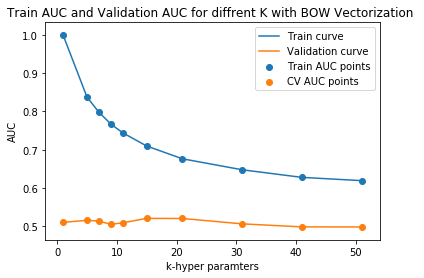

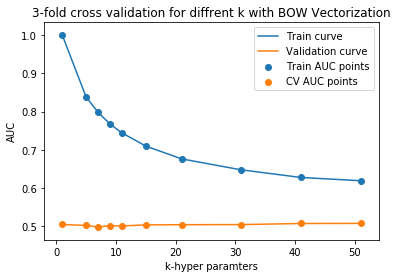

Wall time: 31min 15s


In [84]:
%%time
title="Train AUC and Validation AUC for diffrent K with BOW Vectorization "
title2="3-fold cross validation for diffrent k with BOW Vectorization"
#Reason for choosing odd k’s is there will not be difficulties while calculating majority votes for data point.
#Subseting the trian and cv data because my laptop has only 8GB of RAM
roc_auc_compute(tr_X_BOW[:15000],Y_train[:15000],cv_X_BOW[:3000],Y_cv[:3000],[1,5,7,9, 11, 15, 21, 31, 41, 51],title,title2)



From the above figure the we see can that AUC is stable after k=15 so i choose k=15.<br>Reason behind choosing k=15 is

•	Donor choose data set is imbalanced data.<br>
•	<font color='red'>Whenever we take majority vote we will get majority for "project approved"(label-1) then classifier classifies every data point to class label 1.</font>


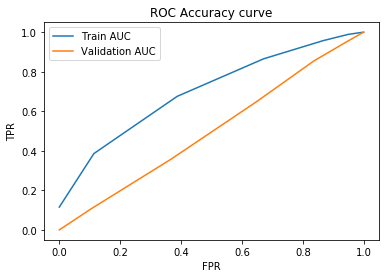

Train AUC = 0.7015966850022378
Test AUC = 0.5013740266936336
Wall time: 5min 38s


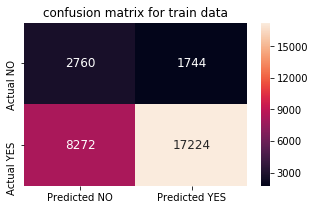

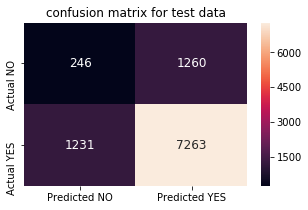

In [156]:
%%time
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best K-Hyper paramter
trained_knn_BOW= KNeighborsClassifier(n_neighbors=15,algorithm='brute')
#trainning model
trained_knn_BOW.fit(tr_X_BOW[:30000],Y_train[:30000])
# predict the response on the train data
predicted_labels_train=trained_knn_BOW.predict_proba(tr_X_BOW[:30000])
# predict the response on the test data
predicted_labels_test=trained_knn_BOW.predict_proba(te_X_BOW[:10000])
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train[:30000],predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test[:10000],predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",auc(tr_fpr,tr_tpr))
print("Test AUC =",auc(te_fpr,te_tpr))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_knn_BOW,tr_threshold,Y_train[:30000],predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_knn_BOW,tr_threshold,Y_test[:10000],predicted_labels_test[:,1],te_tpr,te_fpr,t1)


<h4>Applying KNN brute force on TFIDF<h4>

finished with K= 1
finished with K= 5
finished with K= 7
finished with K= 11
finished with K= 15
finished with K= 21
finished with K= 31
finished with K= 51
finished with K= 61


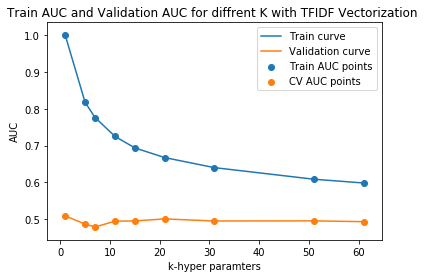

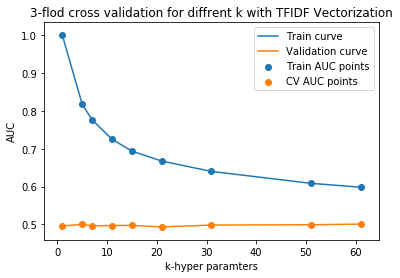

Wall time: 1h 5min 40s


In [86]:
%%time
title="Train AUC and Validation AUC for diffrent K with TFIDF Vectorization "
title2="3-flod cross validation for diffrent k with TFIDF Vectorization"
#Reason for choosing odd k’s is there will not be difficulties while calculating majority votes for data point.
#Subseting the trian and cv data because my laptop has only 8GB of RAM
roc_auc_compute(tr_X_TFIDF[:30000],Y_train[:30000],cv_X_TFIDF[:2500],Y_cv[:2500],[1,5,7,11,15,21,31,51,61],title,title2)



From the above figure the we see can that AUC is stable after k=15 so i choose k=15.<br>Reason behind choosing k=15 is

•	Donor choose data set is imbalanced data.<br>
•	<font color='red'>Whenever we take majority vote we will get majority for "project approved"(label-1) then classifier classifies every data point to class label 1.</font>


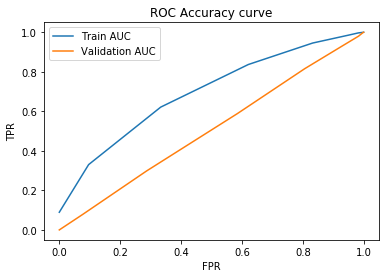

Train AUC = 0.6942680051926091
Test AUC = 0.5055786586016032
Wall time: 3min 57s


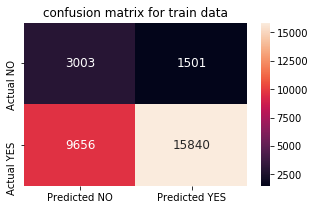

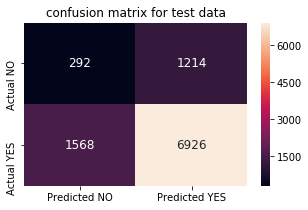

In [157]:
%%time
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best K-Hyper paramter
trained_knn_TFIDF= KNeighborsClassifier(n_neighbors=15,algorithm='brute')
#trainning model
trained_knn_TFIDF.fit(tr_X_TFIDF[:30000],Y_train[:30000])
# predict the response on the train data
predicted_labels_train=trained_knn_TFIDF.predict_proba(tr_X_TFIDF[:30000])
# predict the response on the test data
predicted_labels_test=trained_knn_TFIDF.predict_proba(te_X_TFIDF[:10000])
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train[:30000],predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test[:10000],predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",auc(tr_fpr,tr_tpr))
print("Test AUC =",auc(te_fpr,te_tpr))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_knn_TFIDF,tr_threshold,Y_train[:30000],predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_knn_TFIDF,tr_threshold,Y_test[:10000],predicted_labels_test[:,1],te_tpr,te_fpr,t1)

<h4>Applying KNN brute force on AVG W2V<h4>

finished with K= 1
finished with K= 5
finished with K= 7
finished with K= 11
finished with K= 15
finished with K= 21
finished with K= 31
finished with K= 51
finished with K= 61


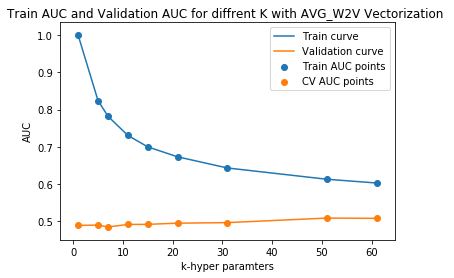

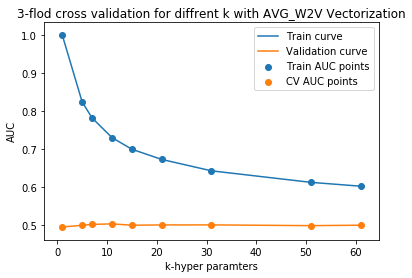

Wall time: 24min 7s


In [125]:
%%time
title="Train AUC and Validation AUC for diffrent K with AVG_W2V Vectorization "
title2="3-flod cross validation for diffrent k with AVG_W2V Vectorization"
#Reason for choosing odd k’s is there will not be difficulties while calculating majority votes for data point.
#Subseting the trian and cv data because my laptop has only 8GB of RAM
roc_auc_compute(tr_X_AVG_W2V[:30000],Y_train[:30000],cv_X_AVG_W2V[:2500],Y_cv[:2500],[1,5,7,11,15,21,31,51,61],title,title2)



From the above figure the we see can that AUC is stable after k=11 so i choose k=11.<br>Reason behind choosing k=11 is

•	Donor choose data set is imbalanced data.<br>
•	<font color='red'>Whenever we take majority vote we will get majority for "project approved"(label-1) then classifier classifies every data point to class label 1.</font>



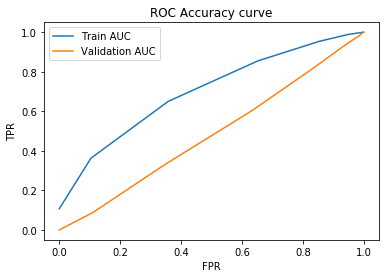

Train AUC = 0.7000603453765045
Test AUC = 0.48177848217834257
Wall time: 1min 43s


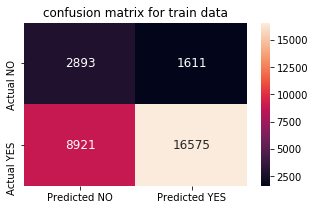

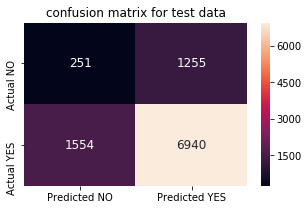

In [162]:
%%time
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best K-Hyper paramter
trained_knn_AVG_W2V= KNeighborsClassifier(n_neighbors=15,algorithm='brute')
#trainning model
trained_knn_AVG_W2V.fit(tr_X_AVG_W2V[:30000],Y_train[:30000])
# predict the response on the train data
predicted_labels_train=trained_knn_AVG_W2V.predict_proba(tr_X_AVG_W2V[:30000])
# predict the response on the test data
predicted_labels_test=trained_knn_AVG_W2V.predict_proba(te_X_AVG_W2V[:10000])
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train[:30000],predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test[:10000],predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",auc(tr_fpr,tr_tpr))
print("Test AUC =",auc(te_fpr,te_tpr))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_knn_AVG_W2V,tr_threshold,Y_train[:30000],predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_knn_AVG_W2V,tr_threshold,Y_test[:10000],predicted_labels_test[:,1],te_tpr,te_fpr,t1)

<h4>Applying KNN brute force on TFIDF W2V<h4>

finished with K= 1
finished with K= 5
finished with K= 7
finished with K= 11
finished with K= 15
finished with K= 21
finished with K= 31
finished with K= 51
finished with K= 61


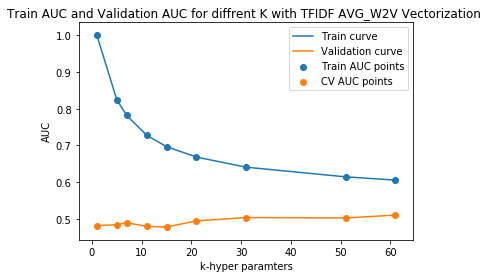

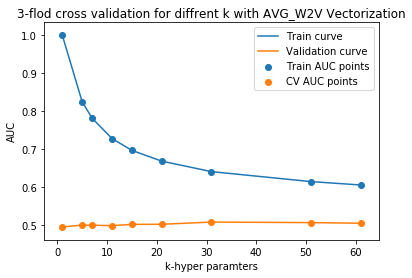

Wall time: 24min 26s


In [126]:
%%time
title="Train AUC and Validation AUC for diffrent K with TFIDF AVG_W2V Vectorization "
title2="3-flod cross validation for diffrent k with AVG_W2V Vectorization"
#Reason for choosing odd k’s is there will not be difficulties while calculating majority votes for data point.
#Subseting the trian and cv data because my laptop has only 8GB of RAM
roc_auc_compute(tr_X_tfidf_w2v[:30000],Y_train[:30000],cv_X_tfidf_w2v[:2500],Y_cv[:2500],[1,5,7,11,15,21,31,51,61],title,title2)


From the above figure the we see can that AUC is stable after k=15 so i choose k=15.<br>Reason behind choosing k=15 is

•	Donor choose data set is imbalanced data.<br>
•	<font color='red'>Whenever we take majority vote we will get majority for "project approved"(label-1) then classifier classifies every data point to class label 1.</font>



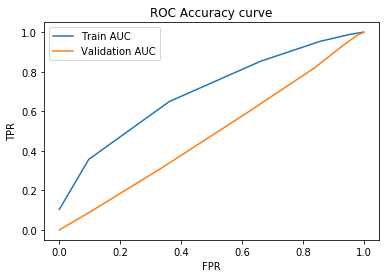

Train AUC = 0.6975095412521785
Test AUC = 0.48363136419083097
Wall time: 1min 34s


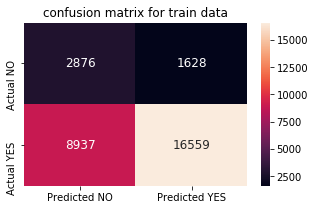

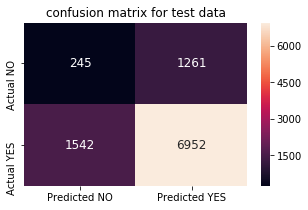

In [159]:
%%time
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best K-Hyper paramter
trained_knn_tfidf_w2v= KNeighborsClassifier(n_neighbors=15,algorithm='brute')
#trainning model
trained_knn_tfidf_w2v.fit(tr_X_tfidf_w2v[:30000],Y_train[:30000])
# predict the response on the train data
predicted_labels_train=trained_knn_tfidf_w2v.predict_proba(tr_X_tfidf_w2v[:30000])
# predict the response on the test data
predicted_labels_test=trained_knn_tfidf_w2v.predict_proba(te_X_tfidf_w2v[:10000])
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train[:30000],predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test[:10000],predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",auc(tr_fpr,tr_tpr))
print("Test AUC =",auc(te_fpr,te_tpr))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_knn_tfidf_w2v,tr_threshold,Y_train[:30000],predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_knn_tfidf_w2v,tr_threshold,Y_test[:10000],predicted_labels_test[:,1],te_tpr,te_fpr,t1)

<h2>2.5 Feature selection with `SelectKBest` </h2>

<h3>Numerical feature normalization</h3>

__<br>
 We need to normalize the numerical futures because ‘SelectKBest` wont accept the negative value and if numerical futures are not normalized then we will face this error (<font color='red'>ValueError: Input X must be non-negative</font>)__

In [127]:
#https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
#Normalized price

tr_price_normalized = np.array((X_train['price']-min(X_train['price']))/(max(X_train['price'])-min(X_train['price']))).reshape(-1, 1)
cv_price_normalized = np.array((X_cv['price']-min(X_cv['price']))/(max(X_cv['price'])-min(X_cv['price']))).reshape(-1, 1)
te_price_normalized = np.array((X_test['price']-min(X_test['price']))/(max(X_test['price'])-min(X_test['price']))).reshape(-1, 1)


In [128]:
#https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
#Normalized quantity
tr_quantity_normalized = np.array((X_train['quantity']-min(X_train['quantity']))/(max(X_train['quantity'])-min(X_train['quantity']))).reshape(-1,1)
cv_quantity_normalized =  np.array((X_cv['quantity']-min(X_cv['quantity']))/(max(X_cv['quantity'])-min(X_cv['quantity']))).reshape(-1, 1)
te_quantity_normalized =  np.array((X_test['quantity']-min(X_test['quantity']))/(max(X_test['quantity'])-min(X_test['quantity']))).reshape(-1, 1)

In [129]:
#https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
#Normalized teacher_number_of_previously_posted_projects
tr_teacher_number_of_previously_posted_projects_normalized = np.array( (X_train['teacher_number_of_previously_posted_projects']-min(X_train['teacher_number_of_previously_posted_projects']))/(max(X_train['teacher_number_of_previously_posted_projects'])-min(X_train['teacher_number_of_previously_posted_projects']))).reshape(-1, 1)
cv_teacher_number_of_previously_posted_projects_normalized =  np.array((X_cv['teacher_number_of_previously_posted_projects']-min(X_cv['teacher_number_of_previously_posted_projects']))/(max(X_cv['teacher_number_of_previously_posted_projects'])-min(X_cv['teacher_number_of_previously_posted_projects']))).reshape(-1, 1)
te_teacher_number_of_previously_posted_projects_normalized = np.array( (X_test['teacher_number_of_previously_posted_projects']-min(X_test['teacher_number_of_previously_posted_projects']))/(max(X_test['teacher_number_of_previously_posted_projects'])-min(X_test['teacher_number_of_previously_posted_projects']))).reshape(-1, 1)

In [130]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(TFIDF_norm)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_TFIDF_norm= hstack((tr_school_state_one_hot,tr_categories_one_hot, tr_sub_categories_one_hot,tr_teacher_prefix_one_hot,tr_grade_category_one_hot,tr_price_normalized,tr_teacher_number_of_previously_posted_projects_normalized,tr_title_tfidf,tr_text_tfidf))
cv_X_TFIDF_norm= hstack((cv_school_state_one_hot,cv_categories_one_hot, cv_sub_categories_one_hot,cv_teacher_prefix_one_hot,cv_grade_category_one_hot,cv_price_normalized,cv_teacher_number_of_previously_posted_projects_normalized,cv_title_tfidf,cv_text_tfidf))
te_X_TFIDF_norm= hstack((te_school_state_one_hot,te_categories_one_hot, te_sub_categories_one_hot,te_teacher_prefix_one_hot,te_grade_category_one_hot,te_price_normalized,te_teacher_number_of_previously_posted_projects_normalized,te_title_tfidf,te_text_tfidf))

tr_X_TFIDF_norm=tr_X_TFIDF_norm.toarray()
cv_X_TFIDF_norm=cv_X_TFIDF_norm.toarray()
te_X_TFIDF_norm=te_X_TFIDF_norm.toarray()
print(tr_X_TFIDF_norm.shape)
print(cv_X_TFIDF_norm.shape)
print(te_X_TFIDF_norm.shape)

(69918, 5226)
(17480, 5226)
(21850, 5226)


In [131]:
%%time
from sklearn.feature_selection import SelectKBest, chi2
print("Shape of dataset before selecting important features \n",tr_X_TFIDF_norm.shape,Y_train.shape)
print(cv_X_TFIDF_norm.shape,Y_cv.shape)
print(te_X_TFIDF_norm.shape,Y_test.shape)
select_best=SelectKBest(chi2, k=2000)
tr_X_new=select_best.fit_transform(tr_X_TFIDF_norm, Y_train)
te_X_new = select_best.transform(te_X_TFIDF_norm)
cv_X_new = select_best.transform(cv_X_TFIDF_norm)
print("Shape of dataset after selecting important features")
print(tr_X_new.shape,Y_train.shape)
print(te_X_new.shape,Y_test.shape)
print(cv_X_new.shape,Y_cv.shape)


Shape of dataset before selecting important features 
 (69918, 5226) (69918,)
(17480, 5226) (17480,)
(21850, 5226) (21850,)
Shape of dataset after selecting important features
(69918, 2000) (69918,)
(21850, 2000) (21850,)
(17480, 2000) (17480,)
Wall time: 8.2 s


<h4>Applying KNN brute force on selected feature TFIDF<h4>

finished with K= 1
finished with K= 5
finished with K= 7
finished with K= 11
finished with K= 15
finished with K= 21
finished with K= 31
finished with K= 51
finished with K= 61


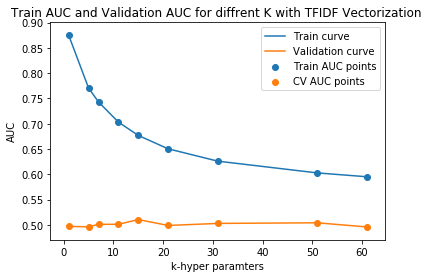

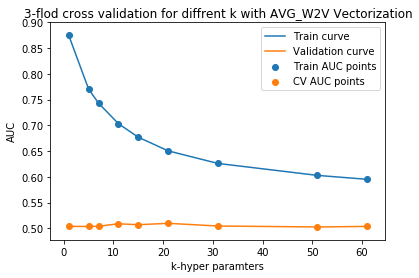

Wall time: 38min 21s


In [132]:
%%time
title="Train AUC and Validation AUC for diffrent K with TFIDF Vectorization "
title2="3-flod cross validation for diffrent k with AVG_W2V Vectorization"
#Reason for choosing odd k’s is there will not be difficulties while calculating majority votes for data point.
#Subseting the trian and cv data because my laptop has only 8GB of RAM
roc_auc_compute(tr_X_new[:30000],Y_train[:30000],cv_X_new[:3000],Y_cv[:3000],[1,5,7,11,15,21,31,51,61],title,title2)


From the above figure the we see can that AUC is stable after k=21 so i choose k=21.<br>Reason behind choosing k=21 is

•	Donor choose data set is imbalanced data.<br>
•	<font color='red'>Whenever we take majority vote we will get majority for "project approved"(label-1) then classifier classifies every data point to class label 1.</font>



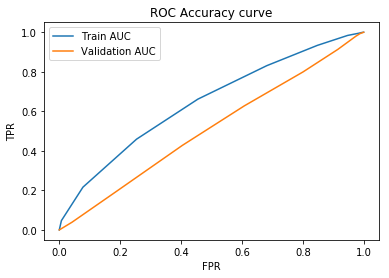

Train AUC = 0.6449876240469024
Test AUC = 0.5097069926087973
Wall time: 2min 25s


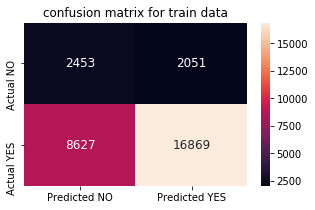

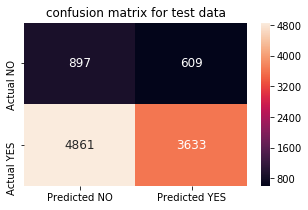

In [164]:
%%time
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best K-Hyper paramter
trained_knn_new= KNeighborsClassifier(n_neighbors=21,algorithm='brute')
#trainning model
trained_knn_new.fit(tr_X_new[:30000],Y_train[:30000])
# predict the response on the train data
predicted_labels_train=trained_knn_new.predict_proba(tr_X_new[:30000])
# predict the response on the test data
predicted_labels_test=trained_knn_new.predict_proba(te_X_new[:10000])
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train[:30000],predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test[:10000],predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",auc(tr_fpr,tr_tpr))
print("Test AUC =",auc(te_fpr,te_tpr))
#drawing confusion matrix for test and train data 
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_knn_new,tr_threshold,Y_train[:30000],predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_knn_new,tr_threshold,Y_test[:10000],predicted_labels_test[:,1],te_tpr,te_fpr,t1)

<h1>3. Conclusions</h1>

In [166]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Hyper parameter", "Test AUC"]

table.add_row(["BOW", "Brute", "15","0.501" ])
table.add_row(["TFIDF", "Brute","15", "0.505"])
table.add_row(["AVG W2V", "Brute", "11","0.490" ])
table.add_row(["TFIDF W2V", "Brute", "15","0.485" ])
table.add_row(["TFIDF 2000 features", "Brute","21" ,"0.509" ])
print(table)

+---------------------+-------+-----------------+----------+
|      Vectorizer     | Model | Hyper parameter | Test AUC |
+---------------------+-------+-----------------+----------+
|         BOW         | Brute |        15       |  0.501   |
|        TFIDF        | Brute |        15       |  0.505   |
|       AVG W2V       | Brute |        11       |  0.490   |
|      TFIDF W2V      | Brute |        15       |  0.485   |
| TFIDF 2000 features | Brute |        21       |  0.509   |
+---------------------+-------+-----------------+----------+
